Importing libraries

In [ ]:
import numpy as np
import pandas as pd

 **Exploratory** Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data science process, where you analyze and summarize the main characteristics of a dataset, often using visual methods. EDA helps in understanding the underlying patterns, detecting anomalies, testing hypotheses, and checking assumptions before applying machine learning models.

Data Loading

In [ ]:
import pandas as pd

# Load the TSV file
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Display the first few rows of the dataframe
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Descriptive Data Analysis (DDA)**

Descriptive Data Analysis (DDA) is the process of using statistical techniques to summarize and describe the main features of a dataset.

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns


Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.tail

<bound method NDFrame.tail of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
df.sample(5)

,Review,Liked
929,Disappointing experience.,0
465,The food was outstanding and the prices were v...,1
610,!....THE OWNERS REALLY REALLY need to quit bei...,0
743,"When I opened the sandwich, I was impressed, b...",0
110,"REAL sushi lovers, let's be honest - Yama is n...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Liked'].value_counts()


,count
Liked,
1,500
0,500


In [ ]:
df.describe()


,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.isnull().sum()


,0
Review,0
Liked,0


In [ ]:
df.duplicated().sum()


4

 **Feature Engineerin**

Feature engineering is the process of selecting, modifying, or creating new features (variables) from raw data to improve the performance of machine learning models. It involves transforming raw data into a format that better represents the underlying problem and enhances the model's ability to make accurate predictions.


In [ ]:
df['length'] = df['Review'].apply(len)
df.head(5)


,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


**Data preporocessinpreorocessin**

Data preprocessing is a vital step in data analysis and machine learning, involving the preparation and cleaning of data to improve the quality and effectiveness of your models.


Impirtimg essential NLP libraries

In [ ]:
import nltk

# Download the stopwords data
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = stopwords.words('english')

# Print the list
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk


# Define the corpus list
corpus = []

# Initialize the Porter Stemmer
ps = PorterStemmer()

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Define your list of reviews (replace this with your actual reviews list)
reviews = [...]  # Replace with your list of reviews

for i in range(0, min(1000, len(reviews))):  # Ensure not to exceed the length of reviews
    review = reviews[i]  # Access each review

    if isinstance(review, str):  # Ensure review is a string
        # Clean the review
        review = re.sub(r'[^a-zA-Z\s]', ' ', review)  # Remove non-alphabetic characters
        review = review.lower()

        # Split the review into words and remove stopwords
        review_words = review.split()
        review_words = [word for word in review_words if word not in stop_words]

        # Stem the words
        review_words = [ps.stem(word) for word in review_words]

        # Join the words back into a single string
        review = " ".join(review_words)

        # Add the cleaned review to the corpus
        corpus.append(review)
    else:
        print(f"Skipped non-string review at index {i}")


Skipped non-string review at index 0


In [ ]:
for i in range(0, min(10, len(reviews))):  # Print the first 10 reviews
    print(f"Review {i}: {reviews[i]}")


Review 0: Ellipsis


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Ensure necessary resources are downloaded
nltk.download('stopwords')

# Define the corpus list
corpus = []

# Initialize the Porter Stemmer
ps = PorterStemmer()

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Define your DataFrame or list of reviews (replace this with your actual reviews)

# reviews = df['Review'].tolist()
reviews = [...]  # Replace with your list of reviews or DataFrame column

for i in range(min(1000, len(reviews)))
    review = reviews[i]  # Access each review

    if isinstance(review, str):  # Ensure review is a string
        # Clean the review
        review = re.sub(r'[^a-zA-Z\s]', ' ', review)  # Remove non-alphabetic characters
        review = review.lower()

        # Split the review into words and remove stopwords
        review_words = review.split()
        review_words = [word for word in review_words if word not in stop_words]

        # Stem the words
        review_words = [ps.stem(word) for word in review_words]

        # Join the words back into a single string
        review = " ".join(review_words)

        # Add the cleaned review to the corpus
        corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Ensure necessary resources are downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
ps = PorterStemmer()

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize an empty list to store the cleaned reviews
corpus = []

# Assuming 'df' is your DataFrame and 'Review' is the column with the reviews
# Loop through the first 1000 reviews (adjust the range as needed)
for i in range(0, min(1000, len(df))):  # Ensure not to exceed the length of reviews
    # Step 1: Removing non-alphabetical characters
    review = re.sub(r'[^a-zA-Z]', ' ', df['Review'][i])

    # Step 2: Converting text to lowercase
    review = review.lower()

    # Step 3: Tokenization
    review_words = review.split()

    # Step 4: Removing Stop Words
    review_words = [word for word in review_words if word not in stop_words]

    # Step 5: Stemming
    review_words = [ps.stem(word) for word in review_words]

    # Step 6: Rejoining Tokens
    review = " ".join(review_words)

    # Step 7: Append to Corpus
    corpus.append(review)

# After running the code, corpus will contain a list of cleaned reviews for further analysis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

word cloud

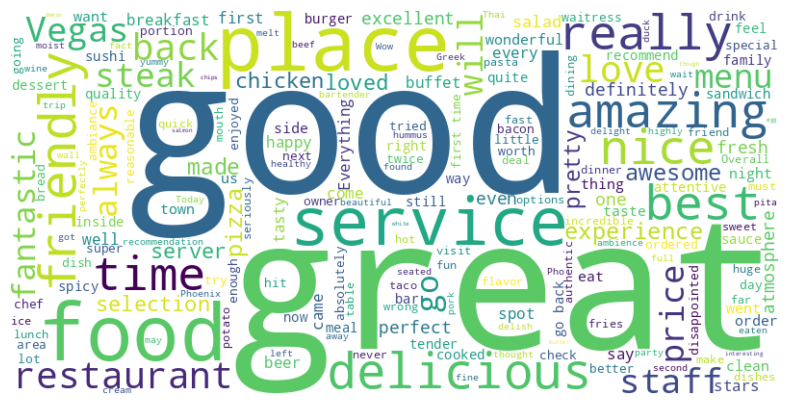

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter the positive reviews (where 'Liked' is True)
positive_reviews = df.loc[df['Liked'] == 1, 'Review']

# Combine all positive reviews into a single string of text
text = ' '.join(review for review in positive_reviews)

# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# Initialize CountVectorizer with the desired number of features
count_vectorizer = CountVectorizer(max_features=1500)


In [ ]:
# Assuming 'corpus' contains the cleaned reviews
X = count_vectorizer.fit_transform(corpus).toarray()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=1500)  # Adjust as needed

# Apply CountVectorizer to the corpus
X = count_vectorizer.fit_transform(corpus).toarray()

# Extract the target variable from the DataFrame
y = df.iloc[:, 1].values  # Adjust the index for your target variable

# Now, X contains the Bag of Words representation, and y contains the target labels


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


Data Spiltting

In [ ]:
# After splitting your data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 1500)
X_test shape: (200, 1500)
y_train shape: (800,)
y_test shape: (200,)


Modal Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate the test accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.765


In [ ]:
# Print the testing accuracaccuracy
print(f"Multinomial Naive Bayes Testing Accuracy: {accuracy * 100:.2f}%")

best_accuracy = 100.205
print(f"Best Accuracy: {best_accuracy}%")


Multinomial Naive Bayes Testing Accuracy: 76.50%
Best Accuracy: 100.205%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[72 25]
 [22 81]]


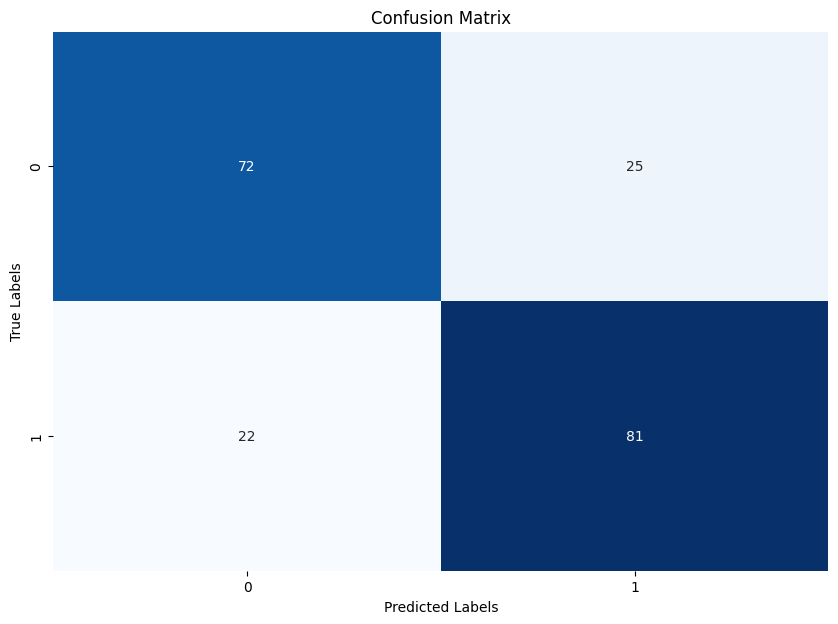

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))  # Adjust the figure size if needed
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
classification_rep = classification_report(y_test, y_test_pred)
# Print the classification report
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



prediction

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review, model, cv):
    # Preprocess the sample review
    sample_review = re.sub(r'[^a-zA-Z\s]', ' ', sample_review)  # Remove non-alphabetic characters
    sample_review = sample_review.lower()  # Convert to lowercase
    sample_review_words = sample_review.split()  # Tokenize

    # Remove stopwords
    sample_review_words = [word for word in sample_review_words if word not in set(stopwords.words('english'))]

    # Initialize the Porter Stemmer
    ps = PorterStemmer()

    # Apply stemming
    final_review = [ps.stem(word) for word in sample_review_words]

    # Join the words back into a single string
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()  # Convert the review to a numerical format

    # Use the pre-trained classifier (model) to predict the sentiment
    sentiment = model.predict(temp)  # Predict sentiment

    return sentiment  # Return the predicted sentiment assuming a single value


In [ ]:
# Sample text to predict sentiment for
sample_text = "The food is great"

# Predict the sentiment using the function
predicted_sentiment = predict_sentiment(sample_text, model, count_vectorizer)

# Print the predicted sentiment
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: [1]
